## __Homework_6__

Рассмотрим граф $G=(V,E)$, вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1. Пример расстановки значений по вершинам графа показан на картинке ниже (черные вершины имеют значение 1, белые - 0):

Как оценить, сколько в среднем закрашенных вершин будет иметь такой граф?

Сформулируем задачу в математических терминах.

Пусть $\xi \in \{0,1\}^{V}$ обозначает конфигурацию графа (расстановку 0 и 1 по вершинам). Назовем конфигурацию допустимой, если вершины, соединенные ребрами, не имеют одновременно значения 1. Пусть $Z_G$ - общее количество допустимых конфигураций. Зададим  распределение на множестве всех конфигураций:
$$\begin{equation*}
\mu(\xi) = 
 \begin{cases}
   \frac{1}{Z_G}, &\text{$\xi$ - допустимая конфигурация}\\
   0, &\text{иначе.}
 \end{cases}
\end{equation*}$$
Обозначим $n(\xi)$ - число закрашенных вершин в конфигурации $\xi$. Тогда
$$
{\rm E} n(\xi) = \sum\limits_{x \in \{0,1\}^V} n(x) \mu(x) = \frac{1}{Z_G} \sum\limits_{x \in \{0,1\}^V} n(x) {\rm I}_{\{x - \text{допустимая} \}}
$$

Явно перебирать все $x \in \{0,1\}^{V}$ не представляется возможным. Мы могли бы попробовать оценить ${\rm E} n(\xi)$, используя закон больших чилел:
$$
{\rm E} n(\xi) \approx \frac{1}{N} \sum\limits_{i=1}^{N} n(\xi), \text{где $\xi \sim \mu$}
$$
Но есть проблема: как смоделировать случайную величину из распределения $\mu$?

В этом нам поможет метод MCMC.


## Задание 
* Оценить  ${\rm E} n(\xi)$ с помощью МСМС для графа 8х8
* Обосновать численно и графически стационарность
* Построить график распределеиня $n(\xi)$
* Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения.
* Дополнительная: построить график зависимости ${\rm E} n(\xi)$ от N - размера графа (NxN). Что можно сказать о скорости роста ${\rm E} n(\xi)$ как функции от N?

Построим функцию, которая будет задавать переход от текущего состояния графа к следующему

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def step(current, N):
    x = np.random.randint(N)
    y = np.random.randint(N)
    if(current[x, y] == 1):
        current[x, y] = 0
    else:
        if(current[max(x - 1, 0), y] == current[min(x + 1, N - 1), y] == 0 and
        current[x, max(y - 1, 0)] == current[x, min(y + 1, N - 1)] == 0):
            current[x, y] = 1
    return current

In [54]:
def En_xi(N):
    n = 10000
    current = np.zeros((N, N))
    # walk - array of numbers of black vertecies 
    walk = []
    #x_max = N #len(current[0, :])
    #y_max = N #len(current[:, 0])
    
    for i in range(n):
        current = step(current, N)
        walk.append(np.sum(current))
    
    return np.sum(walk) / len(walk) #expectation value

In [55]:
print (En_xi(8))

15.2968


Изобразим зависимость ${\rm E} n(\xi)$  от размера графа N

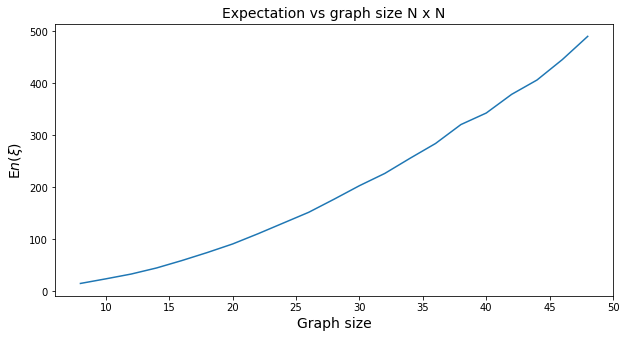

In [30]:
plt.figure(figsize=(10,5))

Expext = np.array([En_xi(i) for i in np.arange(8, 49, 2)])
plt.plot(np.arange(8, 49, 2), Expext)

plt.ylabel(r'${\rm E} n(\xi)$', fontsize=14)
plt.xlabel('Graph size', fontsize=14)
plt.title('Expectation vs graph size N x N', fontsize=14)

plt.show()

Проверим стационарность

In [40]:
from scipy import stats

In [41]:
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

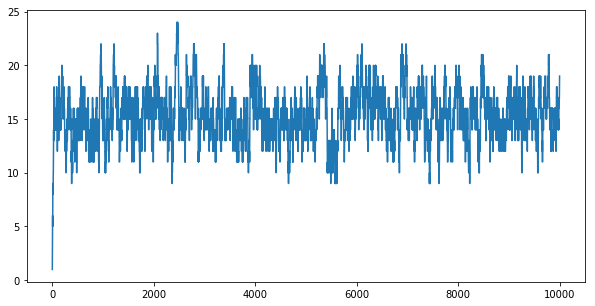

Ttest_indResult(statistic=-1.851647272713799, pvalue=0.06430182902752948)


In [44]:
walk = []
current = np.zeros((8, 8))
for i in range(10000):
    current = step(current, 8, 8)
    walk.append(np.sum(current))
    
plt.figure(figsize=(10,5))

plt.plot(walk)
plt.show()
print (g_test(walk[1000:]))

Гипотезу стационарности не отвергаем

Построим плотность распределения

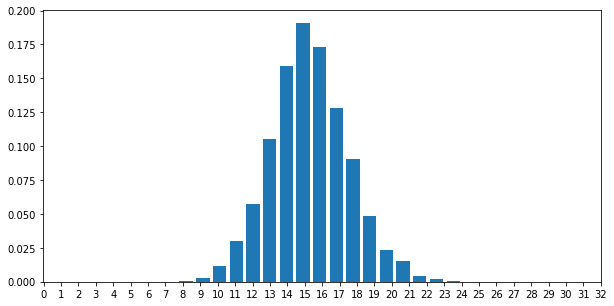

In [46]:
plt.figure(figsize = (10, 5))
plt.hist(walk, bins = np.int(np.max(walk)), rwidth=0.8, density=True)
plt.xticks(np.arange(33)) # 32 -- max amount of '1' in graph 8x8
plt.show()

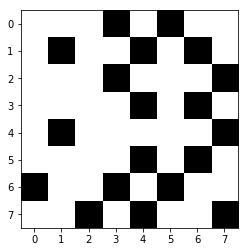

In [57]:
plt.imshow(current, cmap = 'binary')
ax = plt.gca()
ax.set_xticks(np.arange(0, 8, 1))
ax.set_yticks(np.arange(0, 8, 1))
plt.show()